In [1]:
%matplotlib inline

from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from multiprocessing import Pool

In [8]:
class vector:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def __mul__(self, other):
        if type(other) == type(self):
            self.x *= other.x
            self.y *= other.y
            self.z *= other.z
            return self
        else:
            return vector(self.x * other, self.y * other, self.z * other)
    def __rmul__(self, other):
        return self.__mul__(other)
    def __sub__(self, other):
        return vector(self.x - other.x,self.y - other.y,self.z - other.z)
    def __neg__(self):
        self.x = -self.x
        self.y = -self.y
        self.z = -self.z
        return self
    def __add__(self, other):
        self.x += other.x
        self.y += other.y
        self.z += other.z
        return self
    def mag(self):
        return sqrt(self.x*self.x + self.y*self.y + self.z*self.z)
    def mag2(self):
        return abs(self.x*self.x + self.y*self.y + self.z*self.z)
    def norm(self):
        return vector(self.x/self.mag(),self.y/self.mag(),self.z/self.mag())            
    def __truediv__(self, other):
        if type(other) == type(self):
            pass
        else:
            self.x = self.x/other
            self.y = self.y/other
            self.z = self.z/other
            return self
    def __repr__(self):
        return f'[{self.x},\t{self.y},\t{self.z}]'
    def __print__(self):
        return f'[{self.x},\t{self.y},\t{self.z}]'
    
class planet:
    def __init__(self, name="", pos=[0.0, 0.0, 0.0],velocity=[0.0, 0.0, 0.0], mass=1.0):
        self.name = name
        self.pos = vector(pos[0],pos[1],pos[2])
        self.mass = mass
        self.velocity = vector(velocity[0],velocity[1],velocity[2])
        self.trail_x = [pos[0]]
        self.trail_y = [pos[1]]
        self.trail_z = [pos[2]]
        self.force = vector(0.0,0.0,0.0)
    def update(self):
        self.trail_x.append(self.pos.x)
        self.trail_y.append(self.pos.y)
        self.trail_z.append(self.pos.z)
    def rhat(self):
        return self.pos.norm()
    def __repr__(self):
        return f'{self.name}'
    def __print__(self):
        return f'{self.name}'
    
class simulation:
    def __init__(self, sun, planets=[], num=50000, dt=1.0):
        self.sun = sun
        self.planets = planets
        self.num = num
        self.dt = dt
        self.G = 6.67E-11
    def add_planet(self, planet):
        self.planets.append(planet)
    def run_plannet(self, p):
        for x in range(self.num):
            p.force = -p.rhat() * (self.G * p.mass * self.sun.mass) / p.pos.mag2()
            p.velocity = (p.mass * p.velocity + p.force * self.dt) / p.mass
            p.pos = p.pos + (p.velocity * self.dt)
            p.update()
        return p
    def run_mp(self):
        with Pool(processes=4) as pool:
            self.planets = pool.map(self.run_plannet, self.planets)
    def run(self):
        for p in self.planets:
            self.run_plannet(p)
    def plot(self):
        plt.figure(figsize=(15,15))
        axes = plt.gca()
        axes.set_xlabel('x in m')
        axes.set_ylabel('y in m')
        axes.plot(0,0,marker='o',markersize=1,color='red',label='Sun')
        for p in self.planets:
            axes.plot(p.trail_x, p.trail_y,label=p.name)
        plt.axis('equal')
        axes.legend()
        plt.show()
    def plot_3d(self):
        fig = plt.figure(figsize=(15,15))
        ax = fig.gca(projection='3d')
        ax.plot(self.sun.trail_x, self.sun.trail_y, self.sun.trail_z,marker='o',markersize=10, label='Sun')
        for p in self.planets:
            ax.plot(p.trail_x, p.trail_y, p.trail_z, label=p.name)
        plt.axis('equal')
        ax.legend()
        plt.show()
        

CPU times: user 27.8 s, sys: 345 ms, total: 28.2 s
Wall time: 28.7 s


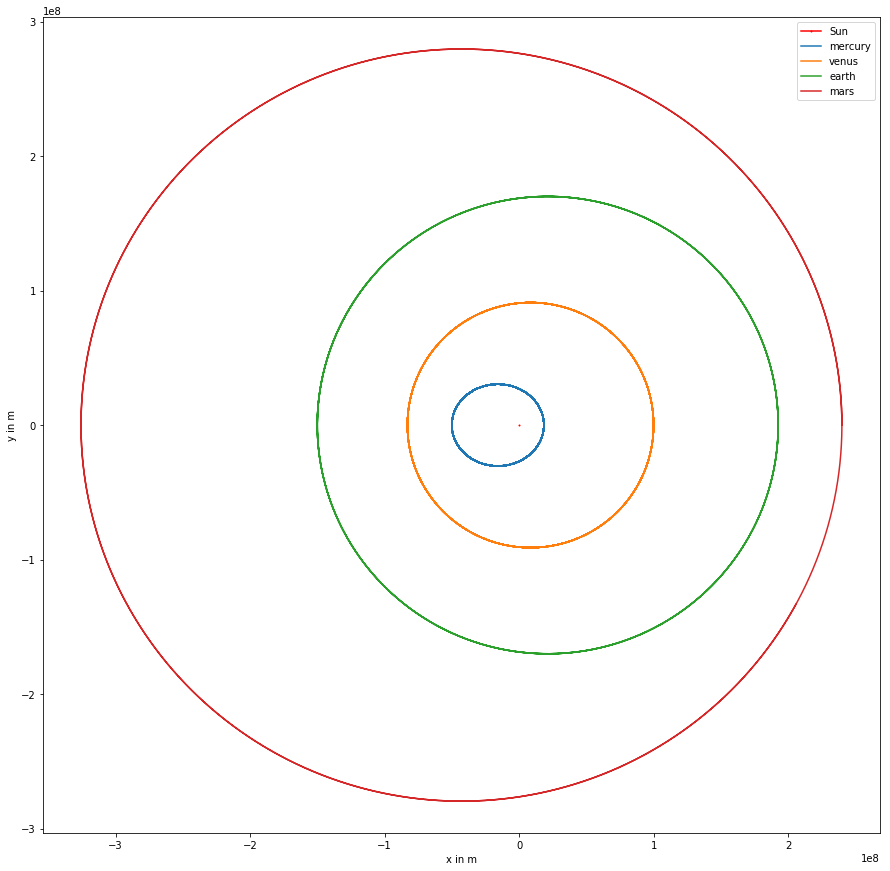

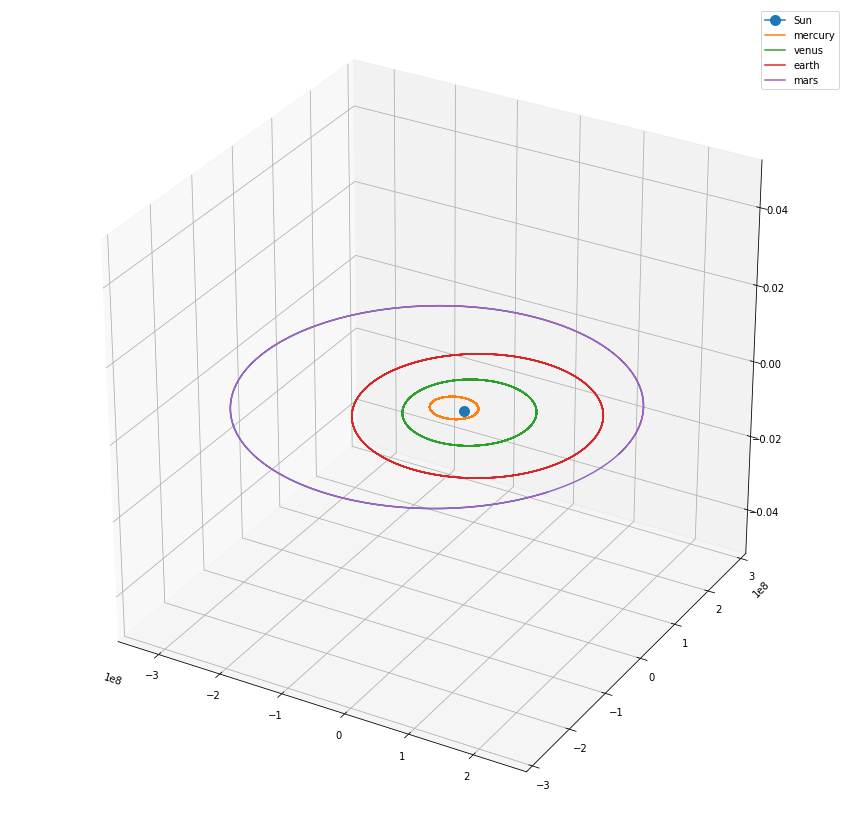

In [23]:
sun = planet(name="sun", mass=2.0E30)
planet1 = planet(name="mercury", pos=[-5.0E7, 0, 0],  velocity=[0, 12.0E5, 0], mass=3.0E23)
planet2 = planet(name="venus",   pos=[1.0E8, 0, 0],  velocity=[0, 11.0E5, 0], mass=4.8E24)
planet3 = planet(name="earth",   pos=[-1.5E8, 0, 0],  velocity=[0, 10.0E5, 0], mass=6.0E24)
planet4 = planet(name="mars",    pos=[2.4E8, 0, 0],  velocity=[0, 8.0E5, 0], mass=6.4E23)

sim = simulation(sun, planets=[planet1,planet2,planet3,planet4], num=500000, dt=0.01)

%time sim.run()
#%time sim.run_mp()

sim.plot()
sim.plot_3d()